In [53]:
from kidanemariam_mychem import *

In [54]:
m=Molecule.from_smiles("c1ccccc1O")

In [29]:
s="c1ccc(c(c1)C2=NC(C(=O)Nc3c2cc(cc3)Cl)O)Cl"

In [30]:
s="C(N)(O)"

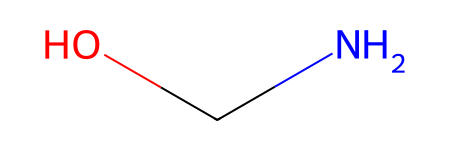

In [31]:
Molecule.from_smiles(s)

In [32]:
token_list=[]

for c in s:
    if c.isdigit() or c in "rlH]":
        token_list[-1]=token_list[-1]+c
    elif token_list and token_list[-1] in "-:=#[":
        token_list[-1]=token_list[-1]+c        
    else:
        token_list.append(c)

In [33]:
token_list

['C', '(', 'N', ')', '(', 'O', ')']

In [34]:
new_token_list = []

for t in token_list:
    if t[0] in "-:=#" and t[-1].isdigit():
        new_token_list[-1] += t
    else:
        new_token_list.append(t)

In [35]:
token_list

['C', '(', 'N', ')', '(', 'O', ')']

In [36]:
new_token_list

['C', '(', 'N', ')', '(', 'O', ')']

In [37]:
eval(str(new_token_list).replace("'(',","[").replace(", ')'","]"))

['C', ['N'], ['O']]

In [38]:
s

'C(N)(O)'

In [39]:
import re

In [40]:
alternatives = [r"\(",
               r"\)",
               r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
re_token = "("+"|".join(alternatives)+")"

In [41]:
print(re_token)

(\(|\)|([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*))


In [42]:
re_token_re=re.compile(re_token)

In [43]:
tokenized = [s[0] for s in re.findall(re_token,s)]
tokenized

['C', '(', 'N', ')', '(', 'O', ')']

In [44]:
t=str(tokenized).replace("'(',","[").replace("')'","]")
t

"['C', [ 'N', ], [ 'O', ]]"

In [45]:
tokenized_nested=eval(t)

In [46]:
[7,]

[7]

In [47]:
atom_numbers={'C':6,'N':7,'O':8,'CL':17,'[NH]':7}
bond_symbol_to_order={None:0,"-":1,"=":2,"#":3,":":1.5}

In [48]:

def build_molecule(mol,liste,previous=None,prev_lower=False,closure_atoms=None):
    if closure_atoms is None:
        closure_atoms= {}
    for atom_token in liste:
        if type(atom_token)==list:
            build_molecule(mol,atom_token,previous,prev_lower,closure_atoms)
        else:
            whole,bond_symbol,atom_symbol,ring_closures=re.match(re_token,atom_token).groups()
            hydrogen_count = 1 if atom_symbol=="[nH]" else 0
            atom= mol.add_atom(atom_numbers[atom_symbol.upper()],hydrogen_count)
            bond_order=bond_symbol_to_order[bond_symbol]
            if bond_order==0 and prev_lower and atom_symbol.islower():
                bond_order=1.5
            else:
                bond_order=1
            
            rc=ring_closures
            if rc:
                if rc not in closure_atoms:
                    closure_atoms[rc] = (atom,atom_symbol.islower())
                else:
                    rc_atom,rc_lower = closure_atoms[rc]
                    del closure_atoms[rc]
                    rc_bond_order = 1.5 if rc_lower and atom_symbol.islower() else 1
                    mol.add_bond(atom,rc_atom,rc_bond_order)
                    
            if previous is not None:
                mol.add_bond(atom,previous,bond_order)
                #add_bond to previous
            previous = atom
            prev_lower = atom_symbol.islower()
    return mol

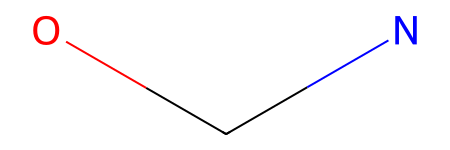

In [55]:
valence= {"C":4,"O":2,"N":3,"Cl":1}
mol=Molecule.empty()
#closure_atoms = {}
build_molecule(mol,tokenized_nested)

# for a in mol.get_atoms():
#     v = valence[a.get_atomic_symbol()]
#     sbo = sum(b.get_order() for b in a.get_bonds())
#     nH=max(0,v-sbo)
#     a.set_hydrogen_count(int(nH))

# mol.to_smiles()

In [50]:
re.match(re_token,"=C1").groups()

('=C1', '=', 'C', '1')

In [51]:
for a in mol.get_atoms():
    print(a.get_hydrogen_count())

2
1
2


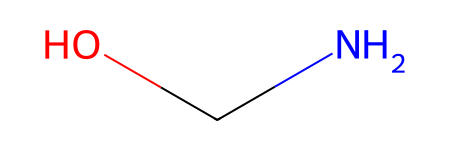

In [52]:
mol

In [56]:
#### redone

In [57]:
def tokenized_nested(smile):
    alternatives = [r"\(",
                   r"\)",
                   r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
    re_token = "("+"|".join(alternatives)+")"
    re_token_re=re.compile(re_token)
    tokenized = [s[0] for s in re.findall(re_token,smile)]
    t=str(tokenized).replace("'(',","[").replace("')'","]")
    #print((type(t)))
    return eval(t)#,type(t)

In [58]:
atom_numbers={'C':6,'N':7,'O':8,'CL':17,'[NH]':7}
bond_symbol_to_order={None:0,"-":1,"=":2,"#":3,":":1.5}

In [59]:
def build_molecule(mol,liste,previous=None,prev_lower=False,closure_atoms=None):
    if closure_atoms is None:
        closure_atoms= {}
    for atom_token in liste:
        if type(atom_token)==list:
            build_molecule(mol,atom_token,previous,prev_lower,closure_atoms)
        else:
            whole,bond_symbol,atom_symbol,ring_closures=re.match(re_token,atom_token).groups()
            hydrogen_count = 1 if atom_symbol=="[nH]" else 0
            atom= mol.add_atom(atom_numbers[atom_symbol.upper()],hydrogen_count)
            bond_order=bond_symbol_to_order[bond_symbol]
            if bond_order==0 and prev_lower and atom_symbol.islower():
                bond_order=1.5
            else:
                bond_order=1
            
            rc=ring_closures
            if rc:
                if rc not in closure_atoms:
                    closure_atoms[rc] = (atom,atom_symbol.islower())
                else:
                    rc_atom,rc_lower = closure_atoms[rc]
                    del closure_atoms[rc]
                    rc_bond_order = 1.5 if rc_lower and atom_symbol.islower() else 1
                    mol.add_bond(atom,rc_atom,rc_bond_order)
                    
            if previous is not None:
                mol.add_bond(atom,previous,bond_order)
                #add_bond to previous
            previous = atom
            prev_lower = atom_symbol.islower()
    return mol

In [60]:
valence= {"C":4,"O":2,"N":3,"Cl":1}
mol=Molecule.empty()
#closure_atoms = {}
alternatives = [r"\(",
               r"\)",
               r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
re_token = "("+"|".join(alternatives)+")"
#build_molecule(mol,tokenized_nested(s))

In [ ]:
def from_simple_smiles(sml):
    valence= {"C":4,"O":2,"N":3,"Cl":1}
    mol=Molecule.empty()
    alternatives = [r"\(",
               r"\)",
               r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
    re_token = "("+"|".join(alternatives)+")"
    atom_numbers={'C':6,'N':7,'O':8,'CL':17,'[NH]':7}
    bond_symbol_to_order={None:0,"-":1,"=":2,"#":3,":":1.5}
    #call the tokenizer_nested funtion inside the build_molecule
    return build_molecule(mol,tokenized_nested(sml))

In [ ]:
def tokenized_nested(smile):
    alternatives = [r"\(",
                   r"\)",
                   r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
    re_token = "("+"|".join(alternatives)+")"
    re_token_re=re.compile(re_token)
    tokenized = [s[0] for s in re.findall(re_token,smile)]
    t=str(tokenized).replace("'(',","[").replace("')'","]")
    #print((type(t)))
    return eval(t)#,type(t)
def build_molecule(mol,liste,previous=None,prev_lower=False,closure_atoms=None):
    if closure_atoms is None:
        closure_atoms= {}
    for atom_token in liste:
        if type(atom_token)==list:
            build_molecule(mol,atom_token,previous,prev_lower,closure_atoms)
        else:
            whole,bond_symbol,atom_symbol,ring_closures=re.match(re_token,atom_token).groups()
            hydrogen_count = 1 if atom_symbol=="[nH]" else 0
            atom= mol.add_atom(atom_numbers[atom_symbol.upper()],hydrogen_count)
            bond_order=bond_symbol_to_order[bond_symbol]
            if bond_order==0 and prev_lower and atom_symbol.islower():
                bond_order=1.5
            else:
                bond_order=1
            
            rc=ring_closures
            if rc:
                if rc not in closure_atoms:
                    closure_atoms[rc] = (atom,atom_symbol.islower())
                else:
                    rc_atom,rc_lower = closure_atoms[rc]
                    del closure_atoms[rc]
                    rc_bond_order = 1.5 if rc_lower and atom_symbol.islower() else 1
                    mol.add_bond(atom,rc_atom,rc_bond_order)
                    
            if previous is not None:
                mol.add_bond(atom,previous,bond_order)
                #add_bond to previous
            previous = atom
            prev_lower = atom_symbol.islower()
    return mol
def from_simple_smiles(sml):
    valence= {"C":4,"O":2,"N":3,"Cl":1}
    mol=Molecule.empty()
    alternatives = [r"\(",
               r"\)",
               r"([-:=#])?(Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\[nH\])(\d*)"]
    re_token = "("+"|".join(alternatives)+")"
    atom_numbers={'C':6,'N':7,'O':8,'CL':17,'[NH]':7}
    bond_symbol_to_order={None:0,"-":1,"=":2,"#":3,":":1.5}
    #call the tokenizer_nested funtion inside the build_molecule
    return build_molecule(mol,tokenized_nested(sml))